# Himydata Technical Test - Exploratory Data Analysis

## Objectives:
1. Load Data
2. Explore Product Information
3. Explore Sample Time Series
4. Compare Multiple Time Series
5. Combine Data for Clustering

## 1. Load Data

Import necessary libraries and set up data paths.

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', '{:.3f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [75]:
# Set up data paths
def setup_data_paths(base_dir='../data'):
    """Set up and validate data paths"""
    paths = {
        'data_dir': base_dir,
        'timeseries_dir': os.path.join(base_dir, 'timeseries'),
        'product_info_file': os.path.join(base_dir, 'info_produits.txt')
    }

    # Check if paths exist
    for name, path in paths.items():
        exists = os.path.exists(path)
        print(f"{name} exists: {exists} - {path}")

    return paths

paths = setup_data_paths()

# Count time series files
timeseries_files = glob(os.path.join(paths['timeseries_dir'], '*.txt'))
print(f"\nFound {len(timeseries_files)} time series files")
print("\nSample filenames:")
for file in timeseries_files[:5]:
    print(f"  - {os.path.basename(file)}")

data_dir exists: True - ../data
timeseries_dir exists: True - ../data\timeseries
product_info_file exists: True - ../data\info_produits.txt

Found 444 time series files

Sample filenames:
  - 18N078.txt
  - 18N079.txt
  - 18N080.txt
  - 18N081.txt
  - 18N082.txt


## 2. Explore Product Information

Load, clean, and analyze the product information dataset.

In [76]:
def load_product_info(filepath):
    """Load product information data"""
    df = pd.read_csv(filepath)
    print(f"Product info shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData types:")
    print(df.dtypes)
    return df

# Load product information
product_info = load_product_info(paths['product_info_file'])

# Display first few rows
print("\nFirst 5 rows of product information:")
product_info.head()

Product info shape: (444, 19)

Columns: ['Unnamed: 0', 'IDENTIFIANT', 'EPAI_COILC', 'LARGCOILVISC', 'Aluminium', 'Azote', 'Bore', 'Carbone', 'Chrome', 'Cuivre', 'Etain', 'Manganese', 'Molybdene', 'Nickel', 'Niobium', 'Phosphore', 'Silicium', 'Soufre', 'Titane']

Data types:
Unnamed: 0        int64
IDENTIFIANT      object
EPAI_COILC      float64
LARGCOILVISC      int64
Aluminium         int64
Azote             int64
Bore              int64
Carbone           int64
Chrome            int64
Cuivre            int64
Etain             int64
Manganese         int64
Molybdene         int64
Nickel            int64
Niobium           int64
Phosphore         int64
Silicium        float64
Soufre            int64
Titane            int64
dtype: object

First 5 rows of product information:


,Unnamed: 0,IDENTIFIANT,EPAI_COILC,LARGCOILVISC,Aluminium,Azote,Bore,Carbone,Chrome,Cuivre,Etain,Manganese,Molybdene,Nickel,Niobium,Phosphore,Silicium,Soufre,Titane
0,0,18N078,2.820,954,675,28,0,17,260,283,36,925,18,143,0,78,48.000,73,687
1,1,18N079,2.230,944,566,52,0,389,466,135,10,2555,6,131,3,95,91.000,116,8
2,2,18N080,2.520,931,282,33,0,39,226,219,49,2355,8,134,2,89,33.000,90,1
3,3,18N081,2.520,931,314,42,0,43,246,223,37,2411,11,134,2,79,26.000,87,1
4,4,18N082,2.520,931,245,46,0,42,277,213,54,2418,10,144,2,91,33.000,70,1


In [77]:
def clean_product_info(df):
    """Remove unnecessary columns from product info dataframe"""
    # Create a copy to avoid modifying the original
    df_cleaned = df.copy()

    # Remove Unnamed: 0 column if present
    if 'Unnamed: 0' in df_cleaned.columns:
        df_cleaned = df_cleaned.drop('Unnamed: 0', axis=1)
        print("Removed 'Unnamed: 0' column")

    # Ensure ID column is string
    df_cleaned['IDENTIFIANT'] = df_cleaned['IDENTIFIANT'].astype(str)

    print(f"Cleaned product info shape: {df_cleaned.shape}")
    return df_cleaned

# Clean product information
product_info_clean = clean_product_info(product_info)

# Display first few rows
print("\nFirst 5 rows of product information after cleaning:")
product_info_clean.head()

Removed 'Unnamed: 0' column
Cleaned product info shape: (444, 18)

First 5 rows of product information after cleaning:


,IDENTIFIANT,EPAI_COILC,LARGCOILVISC,Aluminium,Azote,Bore,Carbone,Chrome,Cuivre,Etain,Manganese,Molybdene,Nickel,Niobium,Phosphore,Silicium,Soufre,Titane
0,18N078,2.820,954,675,28,0,17,260,283,36,925,18,143,0,78,48.000,73,687
1,18N079,2.230,944,566,52,0,389,466,135,10,2555,6,131,3,95,91.000,116,8
2,18N080,2.520,931,282,33,0,39,226,219,49,2355,8,134,2,89,33.000,90,1
3,18N081,2.520,931,314,42,0,43,246,223,37,2411,11,134,2,79,26.000,87,1
4,18N082,2.520,931,245,46,0,42,277,213,54,2418,10,144,2,91,33.000,70,1


In [78]:
def analyze_product_info(df):
    """Analyze product information data"""
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values per column:")
    print(missing_values)

    # Get unique products
    unique_products = df['IDENTIFIANT'].nunique()
    product_ids = df['IDENTIFIANT'].tolist()

    print(f"\nTotal unique products: {unique_products}")
    print(f"Sample product IDs: {product_ids[:5]}")

    # Basic statistics for dimensions
    print("\nStatistics for product dimensions:")
    print(df[['EPAI_COILC', 'LARGCOILVISC']].describe())

    return {
        'missing_values': missing_values,
        'unique_products': unique_products,
        'product_ids': product_ids
    }

# Analyze product information
product_analysis = analyze_product_info(product_info_clean)

Missing values per column:
IDENTIFIANT     0
EPAI_COILC      0
LARGCOILVISC    0
Aluminium       0
Azote           0
Bore            0
Carbone         0
Chrome          0
Cuivre          0
Etain           0
Manganese       0
Molybdene       0
Nickel          0
Niobium         0
Phosphore       0
Silicium        0
Soufre          0
Titane          0
dtype: int64

Total unique products: 444
Sample product IDs: ['18N078', '18N079', '18N080', '18N081', '18N082']

Statistics for product dimensions:
       EPAI_COILC  LARGCOILVISC
count     444.000       444.000
mean        3.138      1279.874
std         0.790       274.451
min         1.840       719.000
25%         2.220      1024.000
50%         3.250      1270.000
75%         3.650      1526.000
max         4.850      1851.000


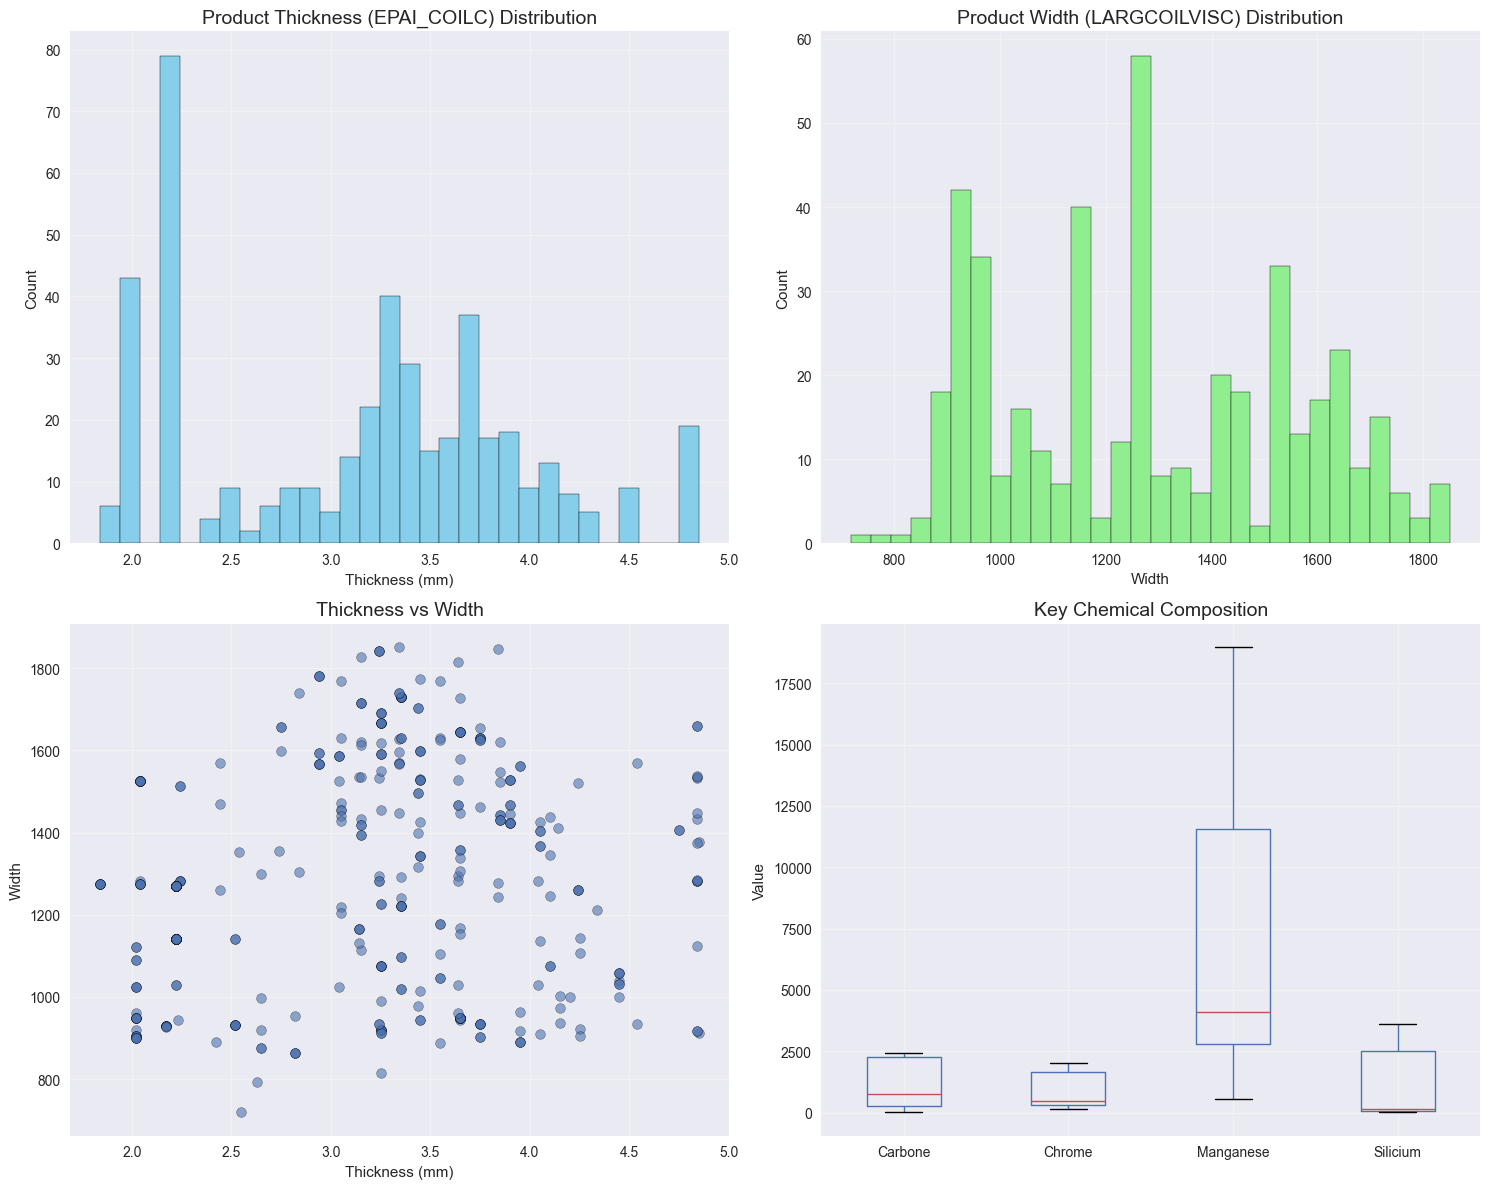

In [79]:
def visualize_product_info(df):
    """Create visualizations for product information"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Thickness distribution
    axes[0, 0].hist(df['EPAI_COILC'], bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Product Thickness (EPAI_COILC) Distribution', fontsize=14)
    axes[0, 0].set_xlabel('Thickness (mm)')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].grid(True, alpha=0.3)

    # Width distribution
    axes[0, 1].hist(df['LARGCOILVISC'], bins=30, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Product Width (LARGCOILVISC) Distribution', fontsize=14)
    axes[0, 1].set_xlabel('Width')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].grid(True, alpha=0.3)

    # Thickness vs Width scatter plot
    axes[1, 0].scatter(df['EPAI_COILC'], df['LARGCOILVISC'], alpha=0.6, edgecolor='black')
    axes[1, 0].set_title('Thickness vs Width', fontsize=14)
    axes[1, 0].set_xlabel('Thickness (mm)')
    axes[1, 0].set_ylabel('Width')
    axes[1, 0].grid(True, alpha=0.3)

    # Example of Chemical composition boxplot
    chemical_cols = ['Carbone', 'Chrome', 'Manganese', 'Silicium']
    df[chemical_cols].boxplot(ax=axes[1, 1])
    axes[1, 1].set_title('Key Chemical Composition', fontsize=14)
    axes[1, 1].set_ylabel('Value')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualize product information
visualize_product_info(product_info_clean)

• Thickness distribution shows distinct peaks at 2.0mm and 3.5mm, with most products between 2.0-4.0mm

• Width distribution clusters around standardized values of 1000mm, 1200mm, and 1500mm

• Scatter plot reveals thickness and width are independently determined with no strong correlation

• Chemical composition boxplot indicates manganese has highest concentration and variability, while carbon, chrome, and silicon have lower, more consistent levels

## 3. Explore Sample Time Series

Load, clean, and analyze a sample time series file.

In [80]:
def load_timeseries_file(filepath):
    """Load a single time series file"""
    df = pd.read_csv(filepath)
    print(f"Loaded: {os.path.basename(filepath)}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:")
    print(df.dtypes)
    return df

# Load a sample time series file
sample_file = os.path.join(paths['timeseries_dir'], '18N078.txt')
sample_ts = load_timeseries_file(sample_file)

Loaded: 18N078.txt
Shape: (300, 24)
Columns: ['Unnamed: 0', 'time', 'Pinceur Inf Mesure de courant', 'Pinceur Sup Mesure de courant', 'Mandrin - Vitesse Actuelle', 'Pinceur Sup Mesure vitesse lineaire', 'Pinceur Inf Mesure vitesse lineaire', 'Mandrin - Mesure Expansion', 'Pinceur Nord Position entrefer estimee', 'Pinceur Sud Position entrefer estimee', 'Pinceur Nord Force entrefer calibree', 'Pinceur Sud Force entrefer calibree', 'Guides Nord Entree Position mesuree', 'Guides Nord Sortie Position mesuree', 'Guides Nord Entree Force pour regulateur PI', 'Guides Nord Sortie Force pour regulateur PI', 'Guides Sud Entree Force pour regulateur PI', 'Guides Sud Sortie Force pour regulateur PI', 'Mandrin - Vitesse Actuelle F10', '_Excentrage largeur bande jauge bob', '_Excentrage largeur bande jauge bob.1', 'TDB pinceur', 'Fenetre', 'Declancheur']
Data types:
Unnamed: 0                                 int64
time                                      object
Pinceur Inf Mesure de courant        

In [81]:
def display_timeseries_sample(df, n=5):
    """Display sample of time series data"""
    print(f"First {n} rows of time series data:")
    display(df.head(n))

# Display first few rows
display_timeseries_sample(sample_ts)

First 5 rows of time series data:


,Unnamed: 0,time,Pinceur Inf Mesure de courant,Pinceur Sup Mesure de courant,Mandrin - Vitesse Actuelle,Pinceur Sup Mesure vitesse lineaire,Pinceur Inf Mesure vitesse lineaire,Mandrin - Mesure Expansion,Pinceur Nord Position entrefer estimee,Pinceur Sud Position entrefer estimee,Pinceur Nord Force entrefer calibree,Pinceur Sud Force entrefer calibree,Guides Nord Entree Position mesuree,Guides Nord Sortie Position mesuree,Guides Nord Entree Force pour regulateur PI,Guides Nord Sortie Force pour regulateur PI,Guides Sud Entree Force pour regulateur PI,Guides Sud Sortie Force pour regulateur PI,Mandrin - Vitesse Actuelle F10,_Excentrage largeur bande jauge bob,_Excentrage largeur bande jauge bob.1,TDB pinceur,Fenetre,Declancheur
0,0,30.05.2024 08:30:36.000000,100.854,40.375,10.727,12.082,12.037,31.088,3.474,2.756,26.236,6.259,519.745,520.525,5.717,8.002,0.687,0.190,10.122,80.527,80.527,1.000,1.000,1
1,1,30.05.2024 08:30:36.010000,100.854,40.375,10.727,12.082,12.037,31.088,3.474,2.756,26.236,6.259,519.745,520.525,5.717,8.002,0.687,0.190,10.122,80.527,80.527,1.000,1.000,1
2,2,30.05.2024 08:30:36.020000,108.105,114.368,10.728,11.978,11.932,30.999,3.376,2.799,28.937,17.331,518.035,518.775,5.750,7.940,0.679,0.168,10.123,80.527,80.527,1.000,1.000,1
3,3,30.05.2024 08:30:36.030000,134.061,129.858,10.725,11.924,11.806,31.049,2.969,2.891,18.576,21.965,516.355,517.080,5.437,7.129,0.624,0.162,10.123,76.570,76.570,1.000,1.000,1
4,4,30.05.2024 08:30:36.040000,134.061,129.858,10.713,11.924,11.806,31.048,2.850,2.933,4.661,23.088,514.860,515.585,4.657,5.561,0.638,0.166,10.123,72.591,72.591,1.000,1.000,1


In [82]:
def clean_timeseries_data(df):
    """Clean time series data by removing unnecessary columns"""
    # Create a copy to avoid modifying the original
    cleaned_df = df.copy()

    # Remove Unnamed columns if present
    unnamed_cols = [col for col in cleaned_df.columns if 'Unnamed' in col]
    if unnamed_cols:
        cleaned_df = cleaned_df.drop(unnamed_cols, axis=1)
        print(f"Removed {len(unnamed_cols)} unnamed column(s)")

    return cleaned_df

# Clean the sample time series
sample_ts_clean = clean_timeseries_data(sample_ts)

Removed 1 unnamed column(s)


In [83]:
def fix_time_column(df):
    """Convert time column to datetime format"""
    # Create a copy to avoid modifying the original
    df_with_time = df.copy()

    if 'time' in df_with_time.columns:
        # Sample time value for diagnosis
        sample_time = df_with_time['time'].iloc[0]
        print(f"Sample time value: {sample_time}")

        try:
            # Try European format (day first)
            df_with_time['time'] = pd.to_datetime(df_with_time['time'], dayfirst=True)
            print("Converted time column to datetime (dayfirst=True)")
        except Exception as e:
            print(f"Error converting time column: {e}")

    return df_with_time

# Fix the time column
sample_ts_clean = fix_time_column(sample_ts_clean)
# Display first few rows after cleaning and processing
display_timeseries_sample(sample_ts_clean)

Sample time value: 30.05.2024 08:30:36.000000
Converted time column to datetime (dayfirst=True)
First 5 rows of time series data:


,time,Pinceur Inf Mesure de courant,Pinceur Sup Mesure de courant,Mandrin - Vitesse Actuelle,Pinceur Sup Mesure vitesse lineaire,Pinceur Inf Mesure vitesse lineaire,Mandrin - Mesure Expansion,Pinceur Nord Position entrefer estimee,Pinceur Sud Position entrefer estimee,Pinceur Nord Force entrefer calibree,Pinceur Sud Force entrefer calibree,Guides Nord Entree Position mesuree,Guides Nord Sortie Position mesuree,Guides Nord Entree Force pour regulateur PI,Guides Nord Sortie Force pour regulateur PI,Guides Sud Entree Force pour regulateur PI,Guides Sud Sortie Force pour regulateur PI,Mandrin - Vitesse Actuelle F10,_Excentrage largeur bande jauge bob,_Excentrage largeur bande jauge bob.1,TDB pinceur,Fenetre,Declancheur
0,2024-05-30 08:30:36.000,100.854,40.375,10.727,12.082,12.037,31.088,3.474,2.756,26.236,6.259,519.745,520.525,5.717,8.002,0.687,0.190,10.122,80.527,80.527,1.000,1.000,1
1,2024-05-30 08:30:36.010,100.854,40.375,10.727,12.082,12.037,31.088,3.474,2.756,26.236,6.259,519.745,520.525,5.717,8.002,0.687,0.190,10.122,80.527,80.527,1.000,1.000,1
2,2024-05-30 08:30:36.020,108.105,114.368,10.728,11.978,11.932,30.999,3.376,2.799,28.937,17.331,518.035,518.775,5.750,7.940,0.679,0.168,10.123,80.527,80.527,1.000,1.000,1
3,2024-05-30 08:30:36.030,134.061,129.858,10.725,11.924,11.806,31.049,2.969,2.891,18.576,21.965,516.355,517.080,5.437,7.129,0.624,0.162,10.123,76.570,76.570,1.000,1.000,1
4,2024-05-30 08:30:36.040,134.061,129.858,10.713,11.924,11.806,31.048,2.850,2.933,4.661,23.088,514.860,515.585,4.657,5.561,0.638,0.166,10.123,72.591,72.591,1.000,1.000,1


In [84]:
def find_target_column(df, target_name='Pinceur Sup Mesure de courant'):
    """Find target column in time series data and its stats"""
    if target_name in df.columns:
        print(f"Found target column: '{target_name}'")
        print(f"\nBasic statistics for target column:")
        print(df[target_name].describe())
        return target_name
    else:
        print(f"Target column '{target_name}' not found")
        return None

# Find the target column
target_column = find_target_column(sample_ts_clean)

Found target column: 'Pinceur Sup Mesure de courant'

Basic statistics for target column:
count    300.000
mean     133.411
std      283.606
min     -200.885
25%     -192.398
50%      258.481
75%      327.674
max      652.753
Name: Pinceur Sup Mesure de courant, dtype: float64


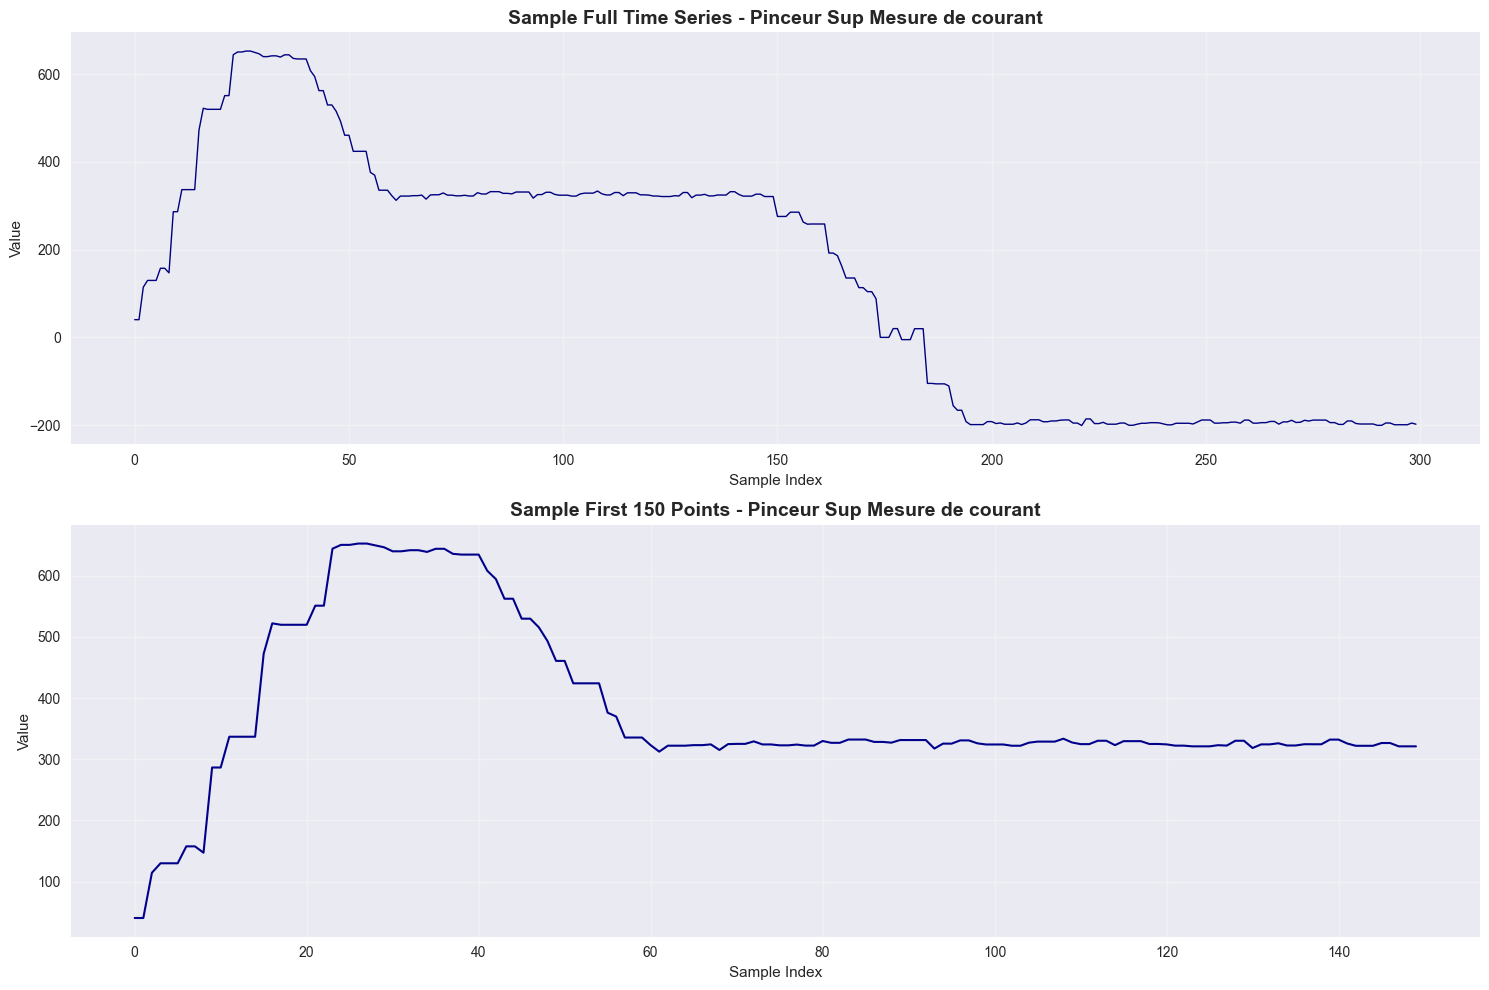

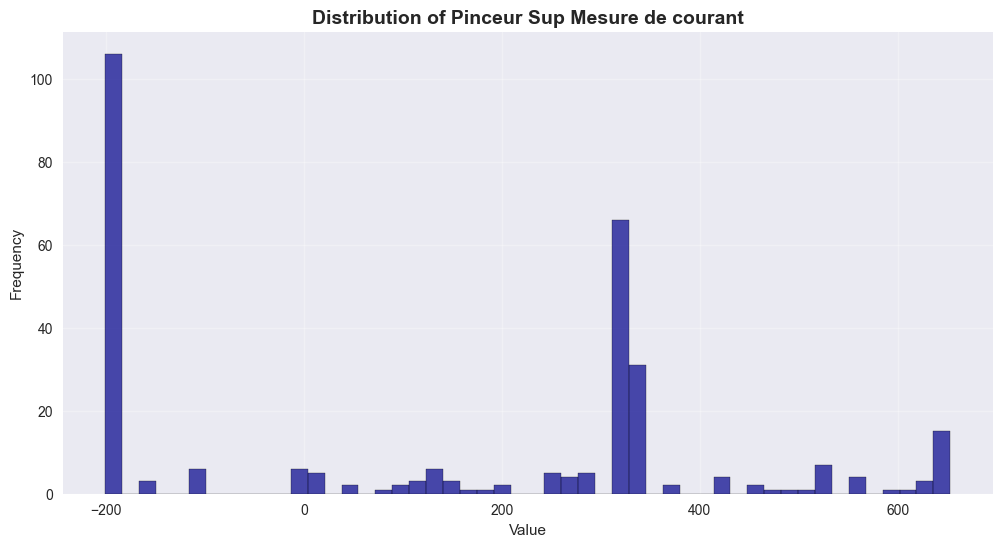

In [85]:
def plot_timeseries(df, column, title_prefix=""):
    """Plot time series data"""
    if column not in df.columns:
        print(f"Column '{column}' not found")
        return

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot full time series
    ax1.plot(df.index, df[column], linewidth=1, color='navy')
    ax1.set_title(f'{title_prefix} Full Time Series - {column}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Sample Index')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)

    # Plot first 150 points for detail
    ax2.plot(df.index[:150], df[column][:150], linewidth=1.5, color='darkblue')
    ax2.set_title(f'{title_prefix} First 150 Points - {column}', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Sample Index')
    ax2.set_ylabel('Value')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_distribution(df, column, bins=50):
    """Plot distribution of a column"""
    if column not in df.columns:
        print(f"Column '{column}' not found")
        return

    plt.figure(figsize=(12, 6))
    plt.hist(df[column], bins=bins, color='darkblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize the target column
if target_column:
    plot_timeseries(sample_ts_clean, target_column, "Sample")
    plot_distribution(sample_ts_clean, target_column)

## 4. Compare Multiple Time Series

Load and compare multiple time series to identify patterns.


Processing: 18N079
Loaded: 18N079.txt
Shape: (300, 24)
Columns: ['Unnamed: 0', 'time', 'Pinceur Inf Mesure de courant', 'Pinceur Sup Mesure de courant', 'Mandrin - Vitesse Actuelle', 'Pinceur Sup Mesure vitesse lineaire', 'Pinceur Inf Mesure vitesse lineaire', 'Mandrin - Mesure Expansion', 'Pinceur Nord Position entrefer estimee', 'Pinceur Sud Position entrefer estimee', 'Pinceur Nord Force entrefer calibree', 'Pinceur Sud Force entrefer calibree', 'Guides Nord Entree Position mesuree', 'Guides Nord Sortie Position mesuree', 'Guides Nord Entree Force pour regulateur PI', 'Guides Nord Sortie Force pour regulateur PI', 'Guides Sud Entree Force pour regulateur PI', 'Guides Sud Sortie Force pour regulateur PI', 'Mandrin - Vitesse Actuelle F10', '_Excentrage largeur bande jauge bob', '_Excentrage largeur bande jauge bob.1', 'TDB pinceur', 'Fenetre', 'Declancheur']
Data types:
Unnamed: 0                                 int64
time                                      object
Pinceur Inf Mesur

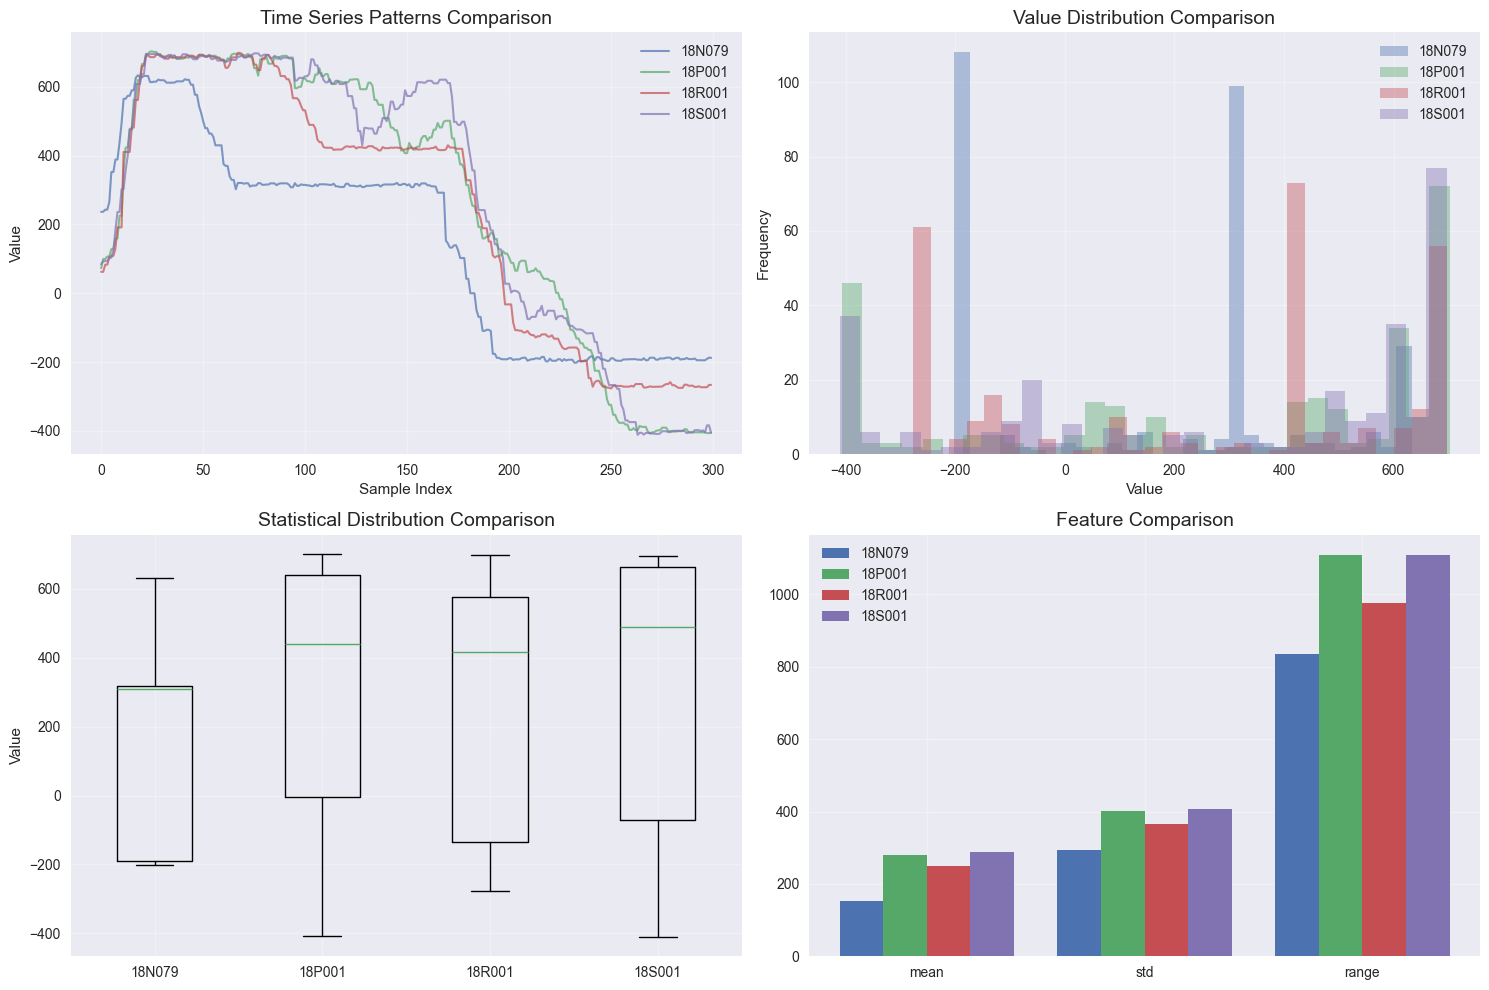


Feature Comparison Table:


,mean,std,min,max,range,skew,kurtosis
18N079,153.950,292.940,-201.630,633.060,834.690,-0.010,-1.450
18P001,279.750,401.500,-407.620,702.190,1109.810,-0.570,-1.170
18R001,249.800,365.180,-276.770,698.150,974.930,-0.290,-1.500
18S001,289.550,408.090,-411.250,696.750,1108.000,-0.560,-1.290



Process Pattern Analysis:


,high_state_ratio,high_state_mean,low_state_mean
18N079,0.603,373.391,-179.822
18P001,0.750,478.126,-315.392
18R001,0.660,487.495,-211.606
18S001,0.683,538.070,-246.724


In [86]:
def compare_multiple_timeseries(timeseries_dir, product_ids, target_column='Pinceur Sup Mesure de courant', max_products=4):
    """Compare multiple time series products and visualize their differences"""
    # Limit number of products to compare
    if len(product_ids) > max_products:
        print(f"Limiting comparison to {max_products} products")
        product_ids = product_ids[:max_products]

    # Storage for processed data
    all_data = {}
    all_features = {}

    # Process each product
    for product_id in product_ids:
        try:
            # Construct filepath
            filepath = os.path.join(timeseries_dir, f"{product_id}.txt")

            # Load and process the data
            print(f"\nProcessing: {product_id}")
            ts_data = load_timeseries_file(filepath)

            # Clean data
            ts_data = clean_timeseries_data(ts_data)
            ts_data = fix_time_column(ts_data)

            # Find target column
            if target_column in ts_data.columns:
                # Store data
                all_data[product_id] = ts_data

                # Extract basic features
                features = {
                    'mean': ts_data[target_column].mean(),
                    'std': ts_data[target_column].std(),
                    'min': ts_data[target_column].min(),
                    'max': ts_data[target_column].max(),
                    'range': ts_data[target_column].max() - ts_data[target_column].min(),
                    'skew': ts_data[target_column].skew(),
                    'kurtosis': ts_data[target_column].kurtosis()
                }
                all_features[product_id] = features
                print(f"Features extracted for {product_id}")
            else:
                print(f"Target column not found in {product_id}")
        except Exception as e:
            print(f"Error processing {product_id}: {e}")

    # Make sure we have data to compare
    if not all_data:
        print("No valid data found for comparison")
        return None

    # COMPARISON VISUALIZATIONS
    plt.figure(figsize=(15, 10))

    # 1. Compare time series patterns
    plt.subplot(2, 2, 1)

    # Determine common length for comparison
    min_length = min(len(df[target_column]) for df in all_data.values())
    sample_length = min(300, min_length)  # Limit to 300 points for visibility

    for product_id, df in all_data.items():
        plt.plot(df[target_column].values[:sample_length],
                label=product_id, alpha=0.7, linewidth=1.5)

    plt.title('Time Series Patterns Comparison', fontsize=14)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Compare distributions
    plt.subplot(2, 2, 2)
    for product_id, df in all_data.items():
        plt.hist(df[target_column].values, bins=30, alpha=0.4, label=product_id)

    plt.title('Value Distribution Comparison', fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Compare boxplots
    plt.subplot(2, 2, 3)
    boxplot_data = [df[target_column].values for df in all_data.values()]
    plt.boxplot(boxplot_data)
    plt.xticks(range(1, len(all_data) + 1), all_data.keys())
    plt.title('Statistical Distribution Comparison', fontsize=14)
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

    # 4. Compare feature values
    plt.subplot(2, 2, 4)
    feature_names = ['mean', 'std', 'range']
    x = np.arange(len(feature_names))
    width = 0.8 / len(all_data)

    for i, (product_id, features) in enumerate(all_features.items()):
        values = [features.get(feat, 0) for feat in feature_names]
        plt.bar(x + i*width, values, width, label=product_id)

    plt.title('Feature Comparison', fontsize=14)
    plt.xticks(x + width * (len(all_data) - 1) / 2, feature_names)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Create detailed feature comparison table
    feature_df = pd.DataFrame(all_features).T
    print("\nFeature Comparison Table:")
    display(feature_df.round(2))

    # Process pattern analysis
    print("\nProcess Pattern Analysis:")
    patterns = {}

    for product_id, df in all_data.items():
        series = df[target_column]

        # Define high and low states based on distribution
        threshold = 0  # Threshold between positive and negative values
        high_state = series[series > threshold]
        low_state = series[series <= threshold]

        # Calculate process patterns
        patterns[product_id] = {
            'high_state_ratio': len(high_state) / len(series),
            'high_state_mean': high_state.mean() if len(high_state) > 0 else 0,
            'low_state_mean': low_state.mean() if len(low_state) > 0 else 0
        }

    patterns_df = pd.DataFrame(patterns).T
    display(patterns_df.round(3))

    return {
        'data': all_data,
        'features': all_features,
        'patterns': patterns
    }

# Compare different types of products
products_to_compare = ['18N079', '18P001', '18R001', '18S001']
comparison_results = compare_multiple_timeseries(
    timeseries_dir=paths['timeseries_dir'],
    product_ids=products_to_compare
)

### Process Characteristics Analysis

Examine key process characteristics across the compared products.

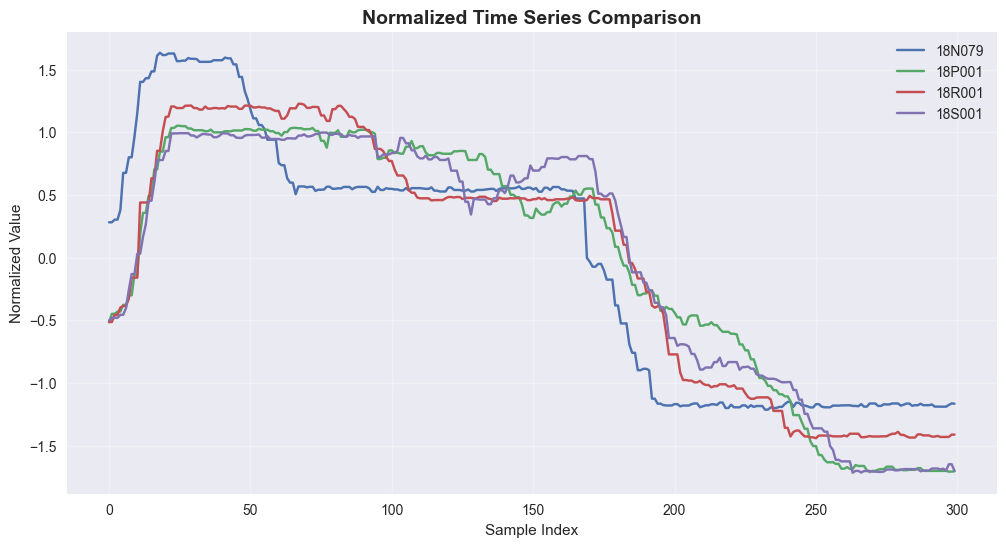

State Transition Analysis:


,transition_point,transition_magnitude
18N079,0.563,138.840
18P001,0.317,81.162
18R001,0.660,62.045
18S001,0.660,74.735


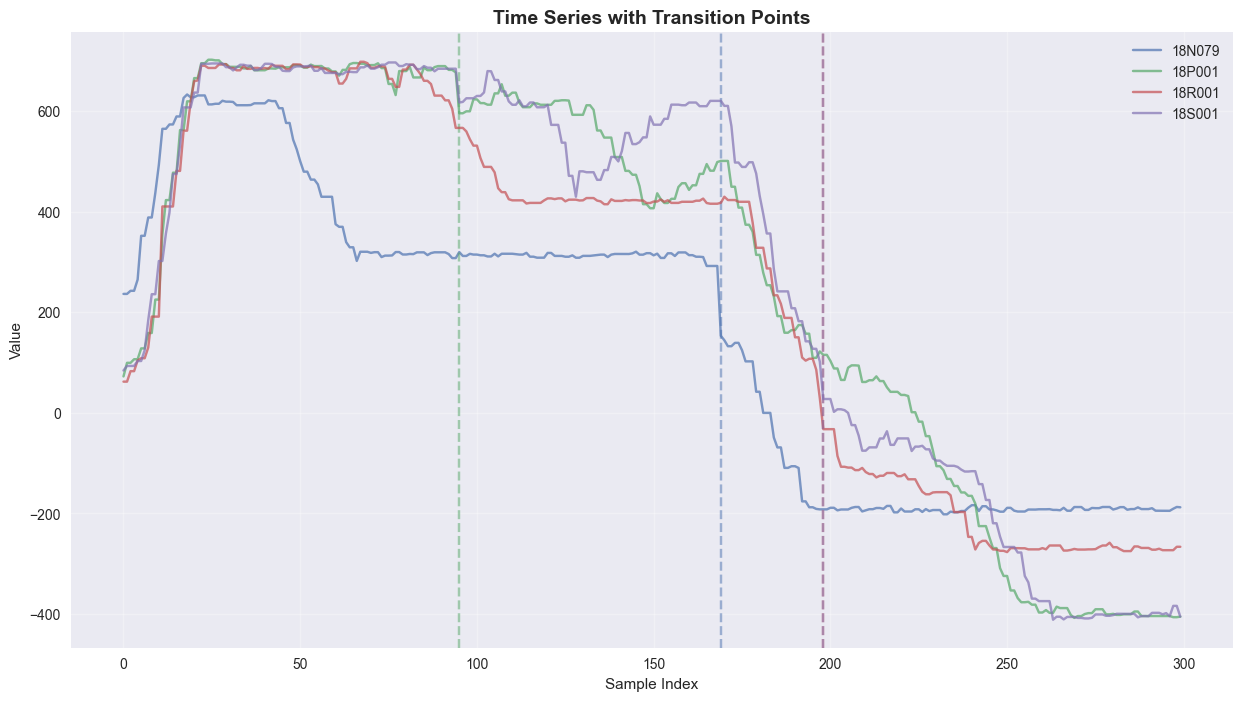

In [87]:
def analyze_process_patterns(comparison_results):
    """Analyze process patterns in more detail"""
    if not comparison_results or 'data' not in comparison_results:
        print("No comparison results available")
        return

    # Normalize time series for shape comparison
    plt.figure(figsize=(12, 6))

    min_length = min(len(df[target_column]) for df in comparison_results['data'].values())
    sample_length = min(300, min_length)

    for product_id, df in comparison_results['data'].items():
        # Normalize series
        series = df[target_column]
        normalized = (series - series.mean()) / series.std()
        plt.plot(normalized.values[:sample_length], label=product_id)

    plt.title('Normalized Time Series Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Sample Index')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Process state transitions
    print("State Transition Analysis:")
    transitions = {}

    for product_id, df in comparison_results['data'].items():
        series = df[target_column]

        # Find major transitions
        diff = series.diff()
        large_drops = diff[diff < -50]  # Significant drops

        if not large_drops.empty:
            largest_drop_idx = large_drops.idxmin()
            largest_drop_time = largest_drop_idx / len(series)  # Normalized time
            largest_drop_magnitude = abs(diff.loc[largest_drop_idx])
        else:
            largest_drop_idx = None
            largest_drop_time = None
            largest_drop_magnitude = None

        transitions[product_id] = {
            'transition_point': largest_drop_time,
            'transition_magnitude': largest_drop_magnitude
        }

    transitions_df = pd.DataFrame(transitions).T
    display(transitions_df)

    # Annotated time series with transition points
    plt.figure(figsize=(15, 8))

    for product_id, df in comparison_results['data'].items():
        series = df[target_column]
        plt.plot(series.values[:sample_length], label=product_id, alpha=0.7)

        # Mark transition point
        transition_point = transitions[product_id]['transition_point']
        if transition_point is not None:
            transition_idx = int(transition_point * len(series))
            if transition_idx < sample_length:
                plt.axvline(x=transition_idx, linestyle='--', alpha=0.5,
                           color=plt.gca().lines[-1].get_color())

    plt.title('Time Series with Transition Points', fontsize=14, fontweight='bold')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Analyze process patterns
analyze_process_patterns(comparison_results)

=> All products follow a similar manufacturing cycle (rise → high plateau → decline → low plateau),

## 5. Combine Data for Clustering

Extract features from all time series and combine with product information.

In [88]:
def extract_timeseries_features(series, product_id):
    """Extract comprehensive features from time series"""
    # Basic statistics
    features = {
        'product_id': product_id,
        'mean': series.mean(),
        'std': series.std(),
        'min': series.min(),
        'max': series.max(),
        'range': series.max() - series.min()
    }

    # Process states (based on bimodal distribution)
    threshold = 0  # Separates high and low states
    high_state = series[series > threshold]
    low_state = series[series <= threshold]

    # State-based features
    features.update({
        'high_state_mean': high_state.mean() if len(high_state) > 0 else 0,
        'low_state_mean': low_state.mean() if len(low_state) > 0 else 0,
        'high_state_ratio': len(high_state) / len(series),
        'high_state_std': high_state.std() if len(high_state) > 0 else 0,
        'low_state_std': low_state.std() if len(low_state) > 0 else 0
    })

    # Transition features
    diff = series.diff()
    large_drops = diff[diff < -50]  # Significant drops

    if not large_drops.empty:
        largest_drop_idx = large_drops.idxmin()
        features['transition_point'] = largest_drop_idx / len(series)  # Normalized time
        features['transition_magnitude'] = abs(diff.loc[largest_drop_idx])
    else:
        features['transition_point'] = 1.0  # No transition found
        features['transition_magnitude'] = 0

    # Trend analysis
    x = np.arange(len(series))
    from scipy import stats
    slope, intercept, _, _, _ = stats.linregress(x, series.values)
    features['trend_slope'] = slope

    return features

def process_all_timeseries(timeseries_dir, product_ids, target_column):
    """Process all time series and extract features"""
    all_features = []
    successful = 0
    failed = []

    print(f"Processing {len(product_ids)} products...")

    for i, product_id in enumerate(product_ids):
        # Progress indicator
        if i % 50 == 0:
            print(f"Progress: {i}/{len(product_ids)}")

        try:
            # Load file
            filepath = os.path.join(timeseries_dir, f"{product_id}.txt")
            df = pd.read_csv(filepath)

            # Clean data
            df = clean_timeseries_data(df)

            # Extract features if target column exists
            if target_column in df.columns:
                features = extract_timeseries_features(df[target_column], product_id)
                all_features.append(features)
                successful += 1
            else:
                failed.append(product_id)
        except Exception as e:
            failed.append(product_id)

    print(f"\nProcessed {successful} products successfully")
    print(f"Failed to process {len(failed)} products")

    # Convert to DataFrame
    return pd.DataFrame(all_features)

# Process all time series files
all_product_ids = product_analysis['product_ids']
timeseries_features = process_all_timeseries(
    timeseries_dir=paths['timeseries_dir'],
    product_ids=all_product_ids,
    target_column='Pinceur Sup Mesure de courant'
)

# Display results
print(f"\nExtracted features shape: {timeseries_features.shape}")
timeseries_features.head()

Processing 444 products...
Progress: 0/444
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Removed 1 unnamed column(s)
Remov

,product_id,mean,std,min,max,range,high_state_mean,low_state_mean,high_state_ratio,high_state_std,low_state_std,transition_point,transition_magnitude,trend_slope
0,18N078,133.411,283.606,-200.885,652.753,853.638,345.123,-179.782,0.597,148.230,45.289,0.617,124.667,-2.900
1,18N079,153.950,292.944,-201.627,633.060,834.687,373.391,-179.822,0.603,139.544,39.166,0.563,138.840,-3.111
2,18N080,112.410,254.275,-170.316,553.546,723.862,317.446,-155.713,0.567,128.749,17.215,0.567,56.607,-2.703
3,18N081,111.614,250.718,-168.338,544.153,712.491,311.170,-152.913,0.570,129.670,27.973,0.523,67.236,-2.622
4,18N082,96.938,248.724,-167.102,540.939,708.041,312.136,-152.321,0.537,120.304,25.473,0.537,66.989,-2.546


In [89]:
def combine_with_product_info(ts_features, product_info):
    """Combine time series features with product information"""
    # Ensure IDs are strings for proper merging
    ts_features['product_id'] = ts_features['product_id'].astype(str)
    product_info['IDENTIFIANT'] = product_info['IDENTIFIANT'].astype(str)

    # Merge dataframes
    combined = pd.merge(
        ts_features,
        product_info,
        left_on='product_id',
        right_on='IDENTIFIANT',
        how='inner'
    )

    # Drop duplicate ID column
    if 'IDENTIFIANT' in combined.columns:
        combined = combined.drop('IDENTIFIANT', axis=1)

    print(f"Combined data shape: {combined.shape}")
    print(f"Products with complete data: {len(combined)}")

    return combined

# Combine time series features with product information
combined_data = combine_with_product_info(timeseries_features, product_info_clean)

# Display the first few rows of the combined data
print("\nCombined data preview:")
combined_data.head()

Combined data shape: (444, 31)
Products with complete data: 444

Combined data preview:


,product_id,mean,std,min,max,range,high_state_mean,low_state_mean,high_state_ratio,high_state_std,low_state_std,transition_point,transition_magnitude,trend_slope,EPAI_COILC,LARGCOILVISC,Aluminium,Azote,Bore,Carbone,Chrome,Cuivre,Etain,Manganese,Molybdene,Nickel,Niobium,Phosphore,Silicium,Soufre,Titane
0,18N078,133.411,283.606,-200.885,652.753,853.638,345.123,-179.782,0.597,148.230,45.289,0.617,124.667,-2.900,2.820,954,675,28,0,17,260,283,36,925,18,143,0,78,48.000,73,687
1,18N079,153.950,292.944,-201.627,633.060,834.687,373.391,-179.822,0.603,139.544,39.166,0.563,138.840,-3.111,2.230,944,566,52,0,389,466,135,10,2555,6,131,3,95,91.000,116,8
2,18N080,112.410,254.275,-170.316,553.546,723.862,317.446,-155.713,0.567,128.749,17.215,0.567,56.607,-2.703,2.520,931,282,33,0,39,226,219,49,2355,8,134,2,89,33.000,90,1
3,18N081,111.614,250.718,-168.338,544.153,712.491,311.170,-152.913,0.570,129.670,27.973,0.523,67.236,-2.622,2.520,931,314,42,0,43,246,223,37,2411,11,134,2,79,26.000,87,1
4,18N082,96.938,248.724,-167.102,540.939,708.041,312.136,-152.321,0.537,120.304,25.473,0.537,66.989,-2.546,2.520,931,245,46,0,42,277,213,54,2418,10,144,2,91,33.000,70,1


In [90]:
# Save the data for clustering
def save_combined_data(df, output_dir='../data'):
    """Save the combined data for clustering"""
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, 'combined_data.csv')
    df.to_csv(filepath, index=False)
    print(f"Saved combined data to {filepath}")
    return filepath

# Save data
saved_path = save_combined_data(combined_data)

Saved combined data to ../data\combined_data.csv


## Summary

In this notebook, we have successfully:

1. **Loaded and processed the product information data**:
   - Cleaned and analyzed 444 products with their physical and chemical properties
   - Visualized key product characteristics like thickness, width, and chemical composition

2. **Explored time series sensor data**:
   - Cleaned and processed the raw time series files
   - Located and analyzed the target column "Pinceur Sup Mesure de courant"
   - Visualized the time series patterns and value distributions

3. **Compared multiple time series products**:
   - Visualized differences in patterns, distributions, and key features
   - Identified process characteristics like high/low states and transitions
   - Found distinctive patterns that can be used for clustering

4. **Combined all data for clustering**:
   - Extracted comprehensive features from time series data
   - Merged with product physical and chemical characteristics
   - Created a complete dataset ready for clustering analysis